# MNIST Exercise

#### 1. The MNIST
MNIST is a simple computer vision dataset. It consists of images of handwritten digits and labels for each image. You may meet warning after running the first line code. It doesn't impact the result of exercise.

#### 1.1 MNIST Data load

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### 1.2 Shape of dataset

In [2]:
import numpy as np
print("Training Data X :", np.vstack([img.reshape(-1,) for img in mnist.train.images]).shape)
print("Training Data Y :", mnist.train.labels.shape)
print("Test Data X :", np.vstack([img.reshape(-1,) for img in mnist.test.images]).shape)
print("Test Data Y :", mnist.test.labels.shape)

Training Data X : (55000, 784)
Training Data Y : (55000, 10)
Test Data X : (10000, 784)
Test Data Y : (10000, 10)


#### 1.3 Data Visualization

If image doesn't come out, please run below code again.

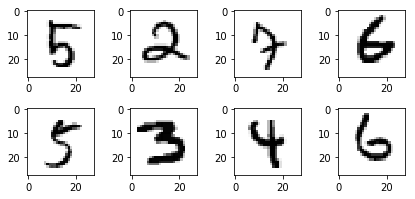

In [5]:
import matplotlib.pyplot as plt
for i in range(1,9):
    plt.subplot(340+i)
    plt.imshow(np.vstack([img.reshape(-1,) for img in mnist.train.images])[30+i*5000].reshape(28,28),cmap='gray_r')
    plt.tight_layout()

#### 2. Import TensorFlow

In [4]:
import tensorflow as tf
## tf.__version__ 

## MNIST with Softmax Regression
The first half of exercise refers to TensorFlow tutorial. https://www.tensorflow.org/versions/r1.4/get_started/mnist/beginners

#### 3. Placeholders
We'll input when we ask TensorFlow to run a computation. We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. (Here None means that a dimension can be of any length.)

In [6]:
x = tf.placeholder(tf.float32, shape=[None, 784])

#### 4. Variables: Weights and biases
A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations.

In [7]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

#### 5. Model Implementation
1. Multiply x by W
2. Add b
3. Apply tf.nn.softmax

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

## Training

#### 6. Cross-entropy placeholder 
new placeholder to input the correct answers

In [9]:
y_ = tf.placeholder(tf.float32, [None, 10])

#### 7. Cross-entropy function

API reference
- tf.reduce_mean https://www.tensorflow.org/api_docs/python/tf/reduce_mean
- tf.nn.softmax_cross_entropy_with_logits_v2 https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2

In [10]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=[1]))

## cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y)) 

#### 8. Optimization algorithm

In [11]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#### 9. Launch model
in an InteractiveSession

In [12]:
sess = tf.InteractiveSession()

#### 10. Initialize the variables

In [13]:
tf.global_variables_initializer().run()

#### 11. Train

Load 100 training examples in each training iteration and train 1000 times

In [14]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

## Evaluate the Model

#### 12. Comparison prediction and the truth

- tf.argmax is an extremely useful function which gives you the index of the highest entry in a tensor along some axis
- tf.equal to check if our prediction matches the truth

In [15]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

That gives us a list of booleans. To determine what fraction are correct, we cast to floating point numbers and then take the mean. For example, [True, False, True, True] would become [1,0,1,1] which would become 0.75

In [16]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9166


## MNIST with CNN

The second half of exercise refers to TensorFlow tutorial with minor modification. https://www.tensorflow.org/versions/r1.4/get_started/mnist/pros

#### 9-1. Weight Initialization

In [18]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

#### 9-2. Convolution and Pooling

In [19]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

#### 9-3. 1st Convolutional Layer

In [20]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

In [21]:
x_image = tf.reshape(x, [-1,28,28,1])

In [22]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

#### 9-4. 2nd Convolutional Layer

In [23]:
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#### 9-5. Densely Connected Layer

In [24]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

#### 9-6. Dropout

In [25]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#### 9-7. Readout Layer

In [26]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

#### 9-8. Train and Evaluate the Model

In [27]:
### Do not replace tf.nn.softmax_cross_entropy_with_logits API to v2, causing crash
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())
for i in range(20000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

### Replaced the original Tensorflow code to prevent GPU memory error
### https://stackoverflow.com/questions/39076388/tensorflow-deep-mnist-resource-exhausted-oom-when-allocating-tensor-with-shape

for i in range(100):
    testSet = mnist.test.next_batch(50)
    print("test accuracy %g"%accuracy.eval(feed_dict={ x: testSet[0], y_: testSet[1], keep_prob: 1.0}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

step 0, training accuracy 0.18
step 100, training accuracy 0.76
step 200, training accuracy 0.9
step 300, training accuracy 0.96


KeyboardInterrupt: 